In [1]:
# Importation of necessary packages/modules

import numpy as np 
import pandas as pd 

import tensorflow as tf
from tensorflow import keras

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt

#Importation of dataset for training/testing data
import os
for dirname, _, filenames in os.walk('/kaggle/input/disease-prediction-using-machine-learning'):
    for filename in filenames:
        if filename == 'Training.csv':
            train_filepath = os.path.join(dirname, filename)
            training_data = pd.read_csv(train_filepath)
        elif filename == 'Testing.csv':
            test_filepath = os.path.join(dirname, filename)
            test_data = pd.read_csv(test_filepath)

#Check content of data variables
print("Training Data:")
training_data.info()
print("\nTest Data:")
test_data.info()

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: l

Training Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Columns: 134 entries, itching to Unnamed: 133
dtypes: float64(1), int64(132), object(1)
memory usage: 5.0+ MB

Test Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Columns: 133 entries, itching to prognosis
dtypes: int64(132), object(1)
memory usage: 43.8+ KB


**Data Preprocessing**

In [2]:
# Check for columns with null values
training_data.isnull().sum()

itching                    0
skin_rash                  0
nodal_skin_eruptions       0
continuous_sneezing        0
shivering                  0
                        ... 
blister                    0
red_sore_around_nose       0
yellow_crust_ooze          0
prognosis                  0
Unnamed: 133            4920
Length: 134, dtype: int64

In [3]:
# Preprocess categorical data in prognosis column into numerical values
dataframes = [training_data, test_data]

label_encoder = preprocessing.LabelEncoder()
for dataframe in dataframes:
    dataframe['prognosis'] = label_encoder.fit_transform(dataframe['prognosis'])

In [4]:
# Convert DataFrame to Numpy Arrays
training_numpy = training_data.to_numpy()
test_numpy = test_data.to_numpy()

In [5]:
# Separate features to target variables for both train/test data
x_train = training_numpy[:,0:132]
x_test = test_numpy[:,0:132]

y_train = training_numpy[:,132]
y_test = test_numpy[:,132]

In [6]:
# Scale data for effective NN training
data_scaler = StandardScaler().fit(x_train)

x_train = data_scaler.transform(x_train)
x_test = data_scaler.transform(x_test)

In [7]:
# Use one-hot encoding for categorical target variables
y_train = tf.keras.utils.to_categorical(y_train,41)
y_test = tf.keras.utils.to_categorical(y_test,41)

In [8]:
print(x_train.shape)
print(y_train.shape)

(4920, 132)
(4920, 41)


**Model Architecture**

In [9]:
target_output = 41
hidden_layer_function = 'sigmoid'

model = tf.keras.models.Sequential()

# Add hidden layers
model.add(keras.layers.Dense(16,
                            input_shape = (132,),
                            name = "Hidden_Layer_1",
                            activation = 'relu'))
# Add hidden layers
model.add(keras.layers.Dense(16,
                            name = "Hidden_Layer_2",
                            activation = 'relu'))
# Add output layer
model.add(keras.layers.Dense(target_output,
                            name = "Output_Layer",
                            activation = 'softmax'))

# Compile the model
model.compile(loss = 'categorical_crossentropy',
            optimizer = 'adam',
            metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Hidden_Layer_1 (Dense)      (None, 16)                2128      
                                                                 
 Hidden_Layer_2 (Dense)      (None, 16)                272       
                                                                 
 Output_Layer (Dense)        (None, 41)                697       
                                                                 
Total params: 3,097
Trainable params: 3,097
Non-trainable params: 0
_________________________________________________________________



Training Progress:
------------------------------------
Epoch 1/5
246/246 [==============================] - 2s 3ms/step - loss: 2.2879 - accuracy: 0.4568 - val_loss: 0.6207 - val_accuracy: 0.9512
Epoch 2/5
246/246 [==============================] - 1s 2ms/step - loss: 0.2277 - accuracy: 0.9914 - val_loss: 0.0319 - val_accuracy: 1.0000
Epoch 3/5
246/246 [==============================] - 1s 2ms/step - loss: 0.0322 - accuracy: 0.9997 - val_loss: 0.0086 - val_accuracy: 1.0000
Epoch 4/5
246/246 [==============================] - 1s 2ms/step - loss: 0.0127 - accuracy: 1.0000 - val_loss: 0.0039 - val_accuracy: 1.0000
Epoch 5/5
246/246 [==============================] - 1s 2ms/step - loss: 0.0069 - accuracy: 1.0000 - val_loss: 0.0021 - val_accuracy: 1.0000

Accuracy during Training :
------------------------------------


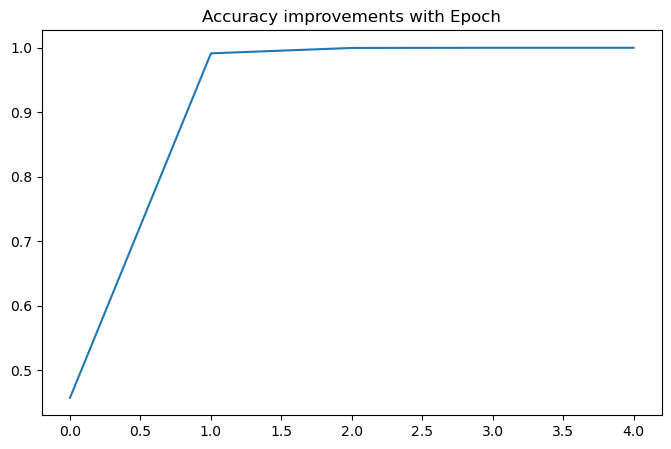


Evaluation against Test Dataset :
------------------------------------
2/2 [==============================] - 0s 6ms/step - loss: 0.1526 - accuracy: 0.9762


[0.15259402990341187, 0.976190447807312]

In [10]:
#Make it verbose so we can see the progress
VERBOSE=1

#Setup Hyper Parameters for training

#Set Batch size
BATCH_SIZE=16
#Set number of epochs
EPOCHS=5
#Set validation split. 20% of the training data will be used for validation
#after each epoch
VALIDATION_SPLIT=0.2

print("\nTraining Progress:\n------------------------------------")

#Fit the model. This will perform the entire training cycle, including
#forward propagation, loss computation, backward propagation and gradient descent.
#Execute for the specified batch sizes and epoch
#Perform validation after each epoch 
history=model.fit(x_train,
          y_train,
          batch_size=BATCH_SIZE,
          epochs=EPOCHS,
          verbose=VERBOSE,
          validation_split=VALIDATION_SPLIT)

print("\nAccuracy during Training :\n------------------------------------")

#Plot accuracy of the model after each epoch.
pd.DataFrame(history.history)["accuracy"].plot(figsize=(8, 5))
plt.title("Accuracy improvements with Epoch")
plt.show()

#Evaluate the model against the test dataset and print results
print("\nEvaluation against Test Dataset :\n------------------------------------")
model.evaluate(x_test,y_test)

**Training
**